## Import Libraries


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data
Load the heat stress and weather data from the provided files.

In [2]:
# Load the Excel and CSV data files
heat_stress_path = 'Processed_HeatStress2.xlsx'
weather_data_path = 'Weather-compiled-cleaned.csv'

# Load heat stress data (assume first sheet is correct)
heat_stress_data = pd.read_excel(heat_stress_path)

# Load weather data
weather_data = pd.read_csv(weather_data_path)


In [3]:
heat_stress_data.head()

,Timestamp,DryBulb,Globe,HeatIndex,Humidity,WBGTIn,WBGTOut,WetBulb,Year,Month,Day,Hour,Minute,DryBulb_Humidity
0,2024-03-16 15:09:20,1.274124,1.346015,-1.042544,-1.184980,1.162992,1.134984,0.572965,2024,3,16,15,9,839.74
1,2024-03-16 15:24:20,1.677636,1.814826,-1.071215,-1.395140,1.767084,1.750336,1.469785,2024,3,16,15,24,687.99
2,2024-03-16 15:39:20,1.479389,1.395172,-1.245662,-1.395140,1.273442,1.276592,0.833153,2024,3,16,15,39,668.78
3,2024-03-16 15:54:20,1.403949,1.384248,-1.388793,-1.437172,1.239631,1.232822,0.744578,2024,3,16,15,54,622.56
4,2024-03-16 16:09:20,1.526757,1.344194,-1.280728,-1.437172,1.239631,1.258569,0.844225,2024,3,16,16,9,633.76


## Prepare the Data
Convert the relevant columns to datetime format and merge both datasets based on the Date column.

In [4]:
# Create a 'Date' column in heat stress data using Year, Month, and Day
heat_stress_data['Date'] = pd.to_datetime(heat_stress_data[['Year', 'Month', 'Day']])

# Convert 'Date' in weather data to datetime
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')

# Merge both datasets on the 'Date' column
merged_data = pd.merge(heat_stress_data, weather_data, on='Date', how='inner')


In [5]:
# Use the correct column names from the merged dataset
X = merged_data[['max air temperature at 1.5mts', 'min air temperature at 1.5mts', 
                 'Pitche Evaporation', 'Pan Evaporation', 'Wind Speed km/h at day', 
                 'Wind Speed km/h at night', 'Rainfall', 'sunshine hour']]

# Fill missing values with 0
X = X.fillna(0)

# Select the target variable y (dependent variable)
y = merged_data['HeatIndex']

## Select Features for Machine Learning
Choose the features (independent variables) from the weather data that are likely to influence heat stress, and choose the heat stress indicator (HeatIndex) as the target variable.

In [6]:
# Select features for X (independent variables)
X = merged_data[['max air temperature at 1.5mts', 'min air temperature at 1.5mts',
                 'Pitche Evaporation', 'Pan Evaporation', 'Wind Speed km/h at day',
                 'Wind Speed km/h at night', 'Rainfall', 'sunshine hour']]

# Fill missing values with 0
X = X.fillna(0)

# Select the target variable y (dependent variable)
y = merged_data['HeatIndex']


In [7]:
merged_data.head()

,Timestamp,DryBulb,Globe,HeatIndex,Humidity,WBGTIn,WBGTOut,WetBulb,Year,Month,...,Pitche Evaporation,Pan Evaporation,Wind Speed km/h at day,Wind Speed km/h at night,Wind Speed Avarage(m/s),sunshine hour,Rainfall,Max Air Temp Rolling Avg,Min Air Temp Rolling Avg,Rainfall Rolling Avg
0,2024-03-19 07:05:09,-1.301334,-1.082703,1.526310,1.463033,-1.145178,-1.192542,-1.192997,2024,3,...,1.15,1.085,6.3,4.4,1.209055,0.479102,2.675271,90.9,46.1,2.675271
1,2024-03-19 07:20:09,-1.120631,-0.785940,1.301580,1.252873,-0.793543,-0.847533,-0.733515,2024,3,...,1.15,1.085,6.3,4.4,1.209055,0.479102,2.675271,90.9,46.1,2.675271
2,2024-03-19 07:35:09,-0.906594,-0.503743,0.568944,0.748490,-0.543341,-0.610661,-0.589581,2024,3,...,1.15,1.085,6.3,4.4,1.209055,0.479102,2.675271,90.9,46.1,2.675271
3,2024-03-19 07:50:09,-0.836418,-0.550169,0.246955,0.538330,-0.638012,-0.695625,-0.805482,2024,3,...,1.15,1.085,6.3,4.4,1.209055,0.479102,2.675271,90.9,46.1,2.675271
4,2024-03-19 08:05:09,-0.624136,-0.284357,-0.103483,0.244106,-0.326950,-0.384087,-0.406895,2024,3,...,1.15,1.085,6.3,4.4,1.209055,0.479102,2.675271,90.9,46.1,2.675271


In [8]:
merged_data.tail()

,Timestamp,DryBulb,Globe,HeatIndex,Humidity,WBGTIn,WBGTOut,WetBulb,Year,Month,...,Pitche Evaporation,Pan Evaporation,Wind Speed km/h at day,Wind Speed km/h at night,Wind Speed Avarage(m/s),sunshine hour,Rainfall,Max Air Temp Rolling Avg,Min Air Temp Rolling Avg,Rainfall Rolling Avg
325,2024-03-25 16:23:51,0.258327,0.157145,-0.785174,-0.554501,0.166692,0.182346,0.174378,2024,3,...,0.45,0.935,4.0,0.0,1.209055,0.479102,2.675271,90.0,45.566667,2.675271
326,2024-03-25 16:38:51,0.286397,0.168069,-0.683725,-0.512469,0.189233,0.210668,0.224201,2024,3,...,0.45,0.935,4.0,0.0,1.209055,0.479102,2.675271,90.0,45.566667,2.675271
327,2024-03-25 16:53:51,0.488153,0.822584,-0.889930,-0.722629,0.813611,0.769377,0.711363,2024,3,...,0.45,0.935,4.0,0.0,1.209055,0.479102,2.675271,90.0,45.566667,2.675271
328,2024-03-25 17:08:51,0.388152,0.477575,-0.977926,-0.722629,0.520582,0.514482,0.578501,2024,3,...,0.45,0.935,4.0,0.0,1.209055,0.479102,2.675271,90.0,45.566667,2.675271
329,2024-03-25 17:57:59,0.214467,-0.133245,-0.823768,-0.554501,-0.139862,-0.090572,-0.146706,2024,3,...,0.45,0.935,4.0,0.0,1.209055,0.479102,2.675271,90.0,45.566667,2.675271


<Figure size 2200x2000 with 0 Axes>

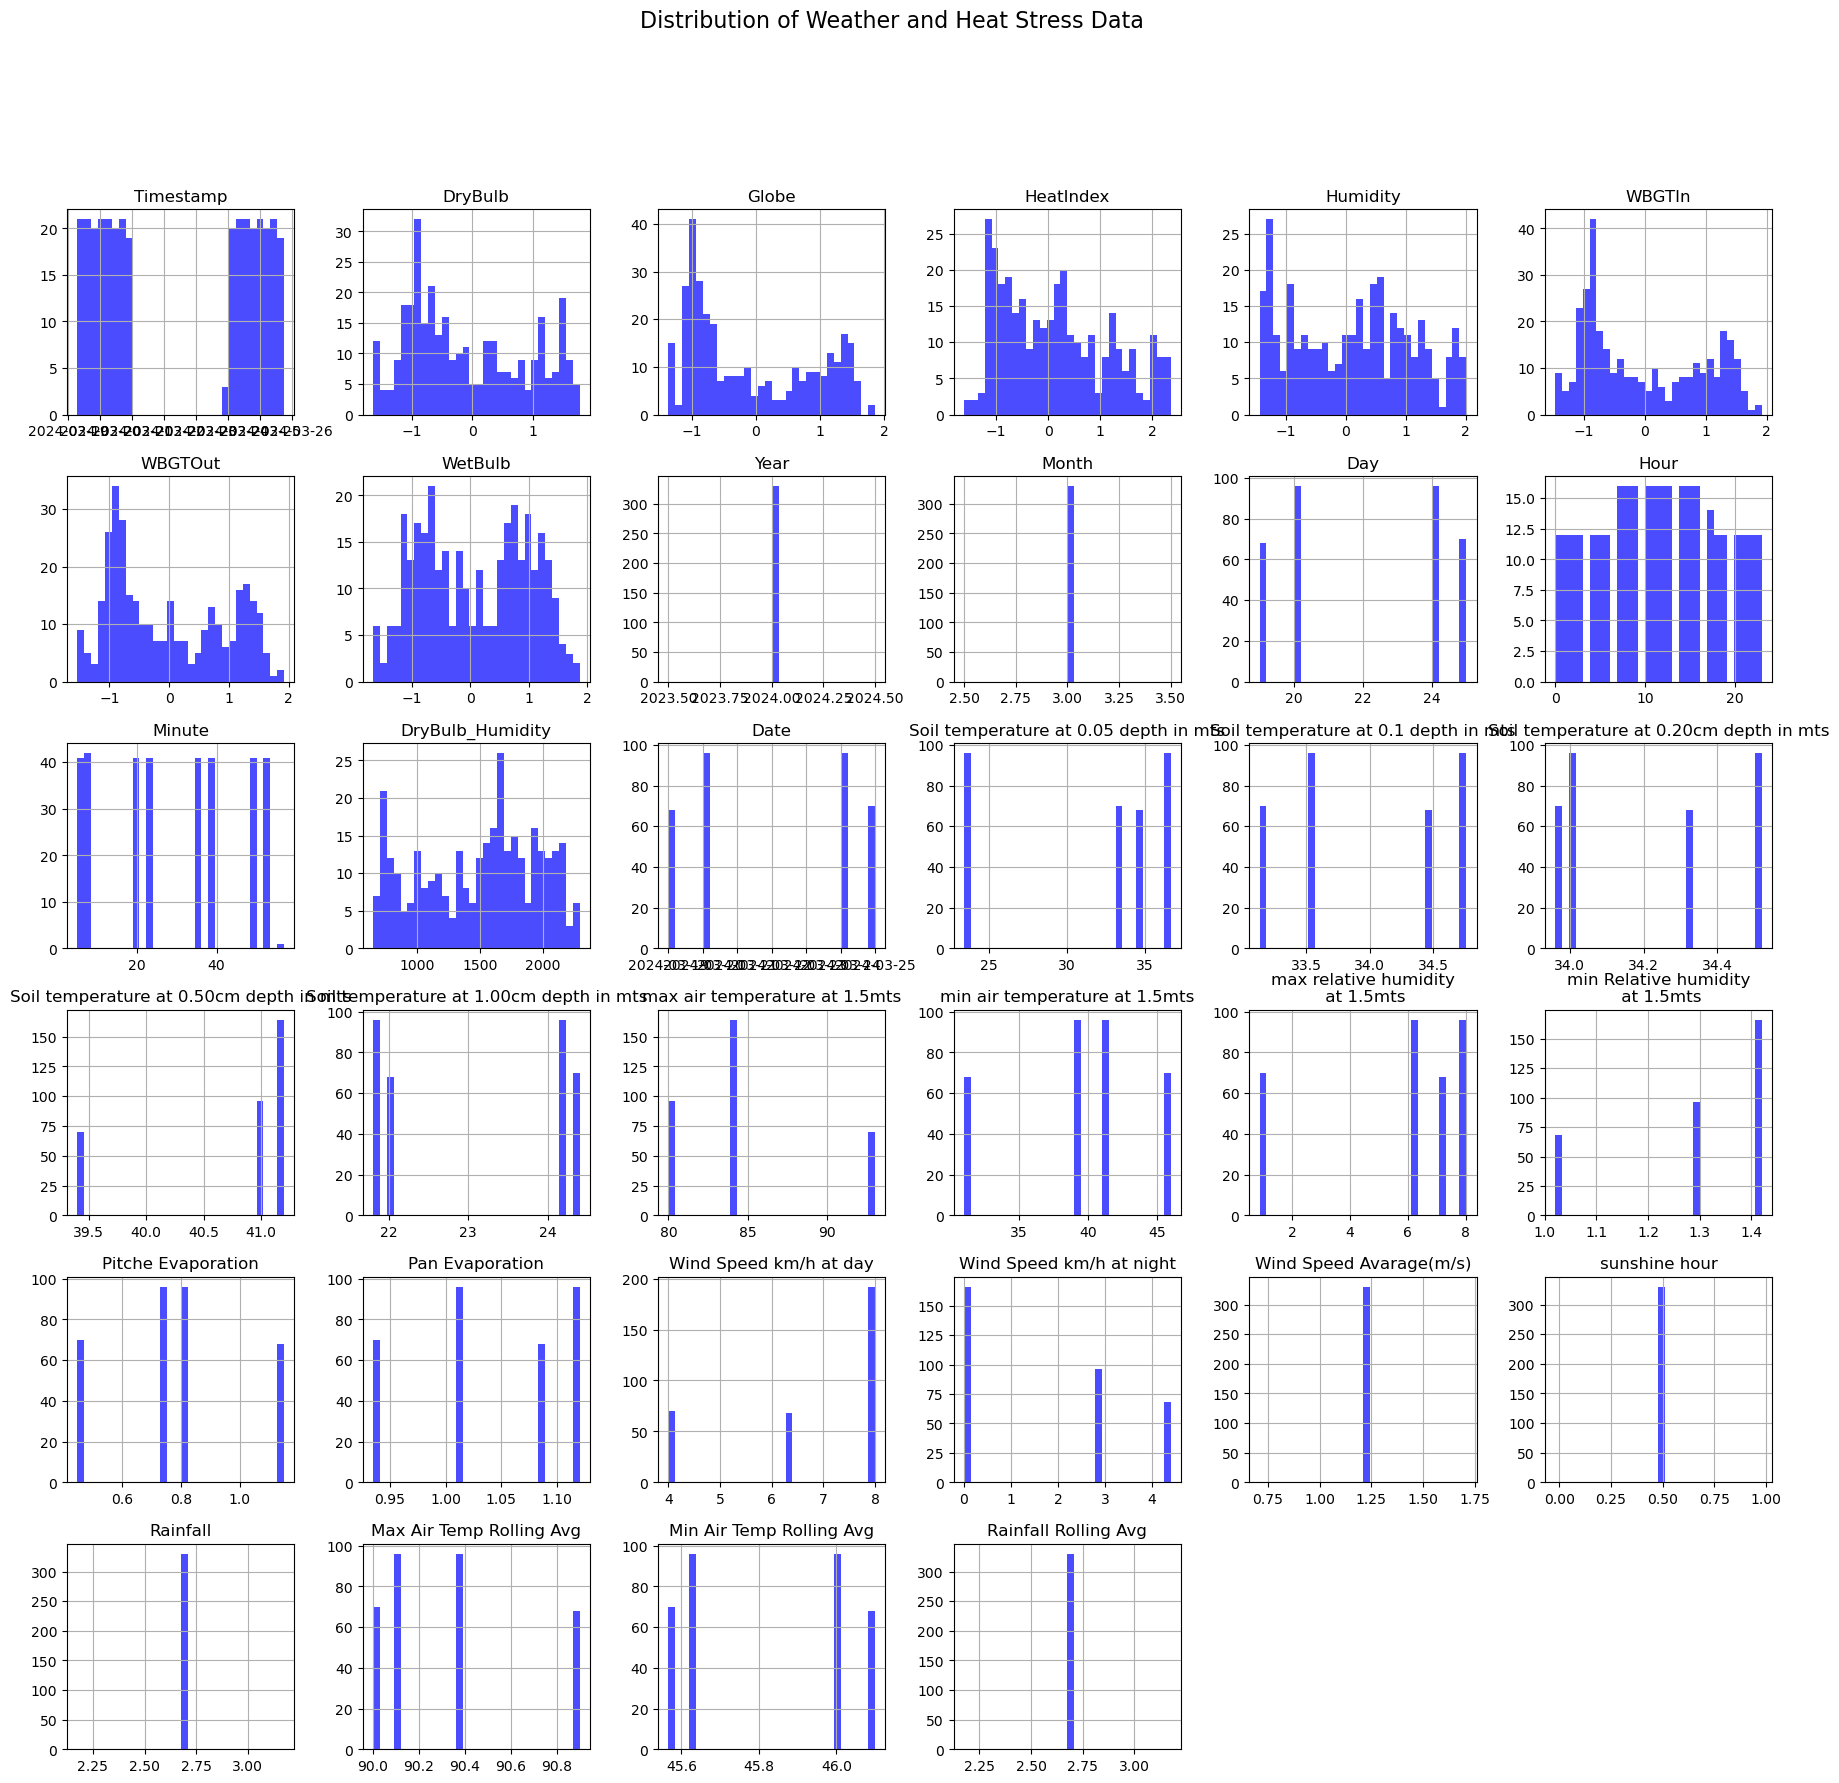

In [9]:
# Visualizations: Histogram of Weather Features
plt.figure(figsize=(22, 20))
merged_data.hist(bins=30, figsize=(22, 20), color='blue', alpha=0.7)
plt.suptitle('Distribution of Weather and Heat Stress Data', fontsize=16)
plt.show()

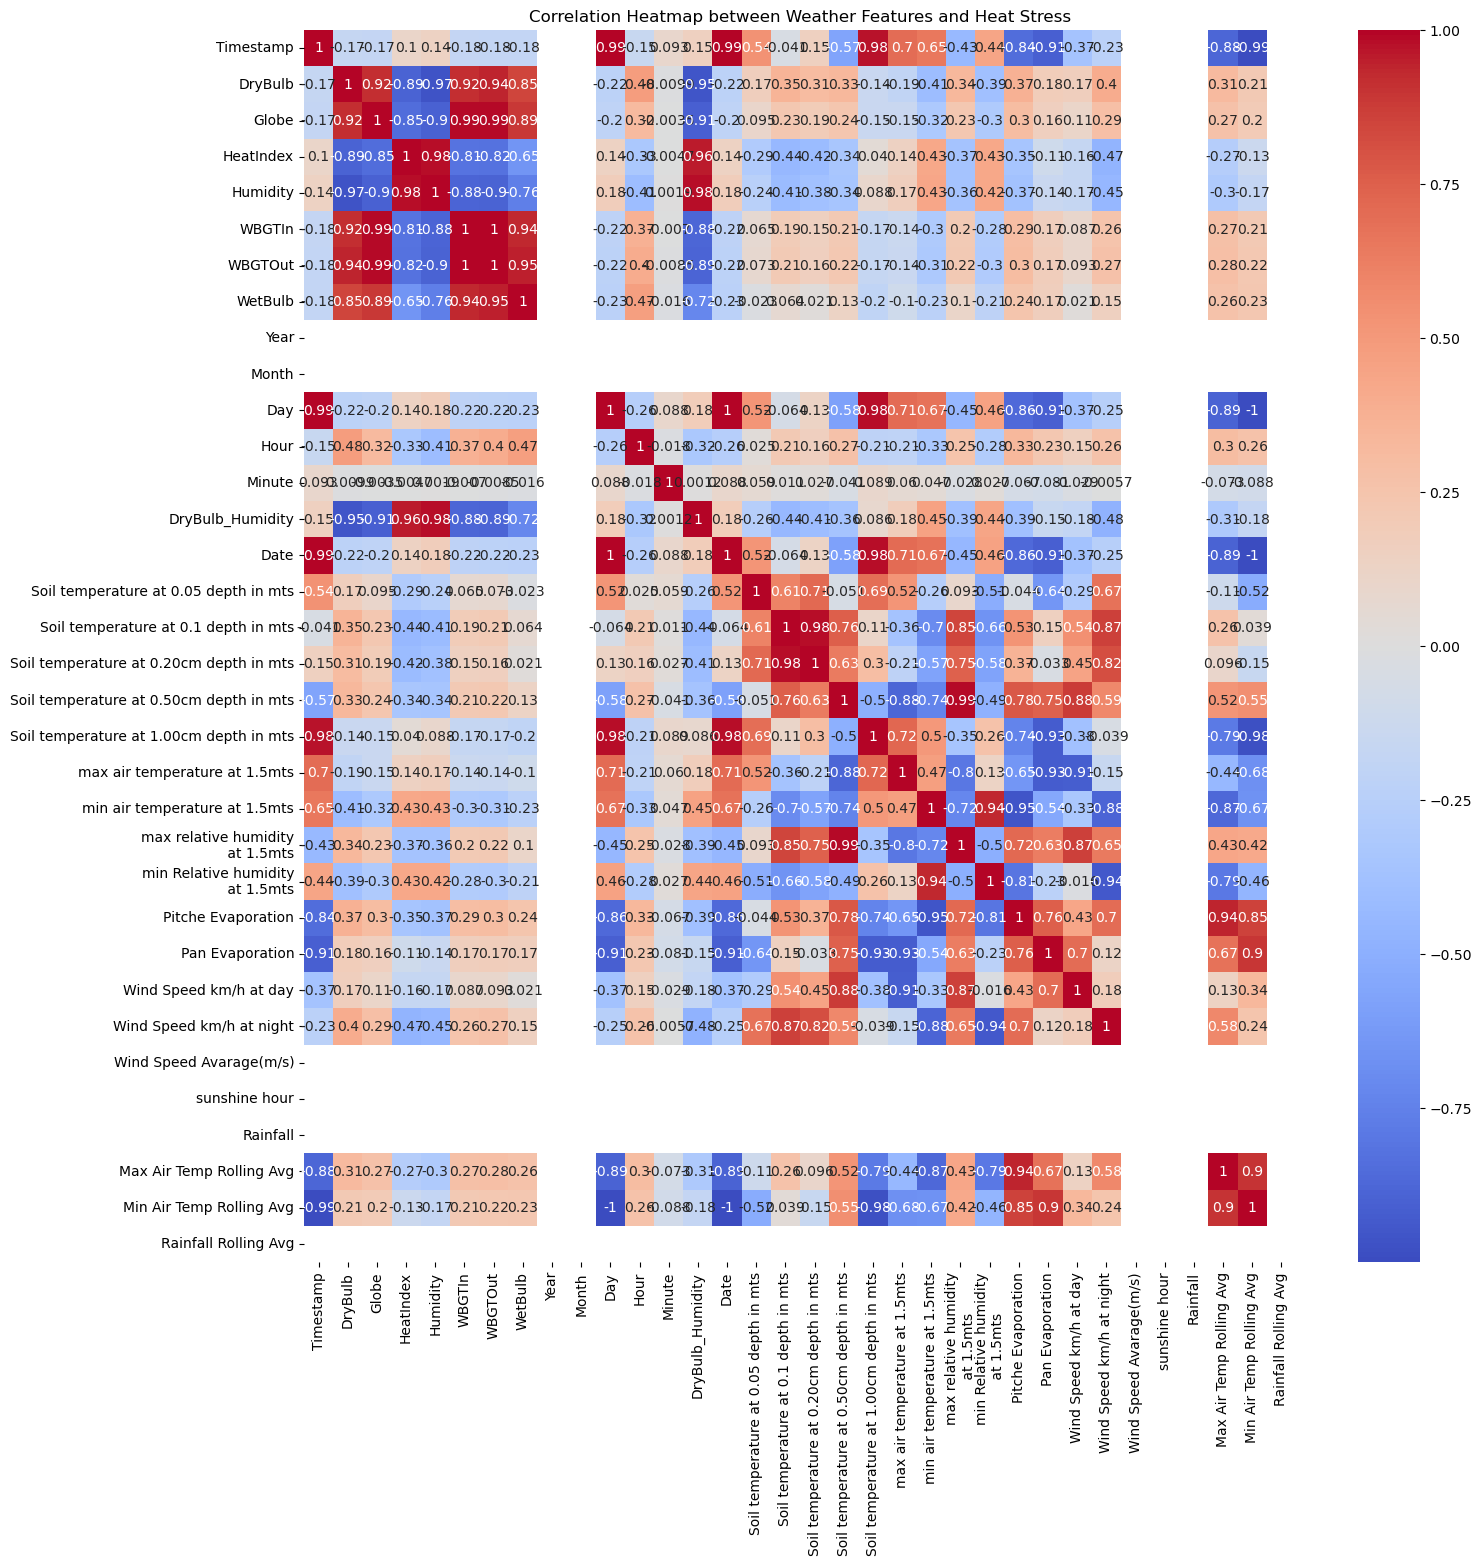

In [10]:
# Correlation Heatmap to check correlation between features and heat stress
plt.figure(figsize=(16, 16))
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Weather Features and Heat Stress')
plt.show()

C:\Users\gezeg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


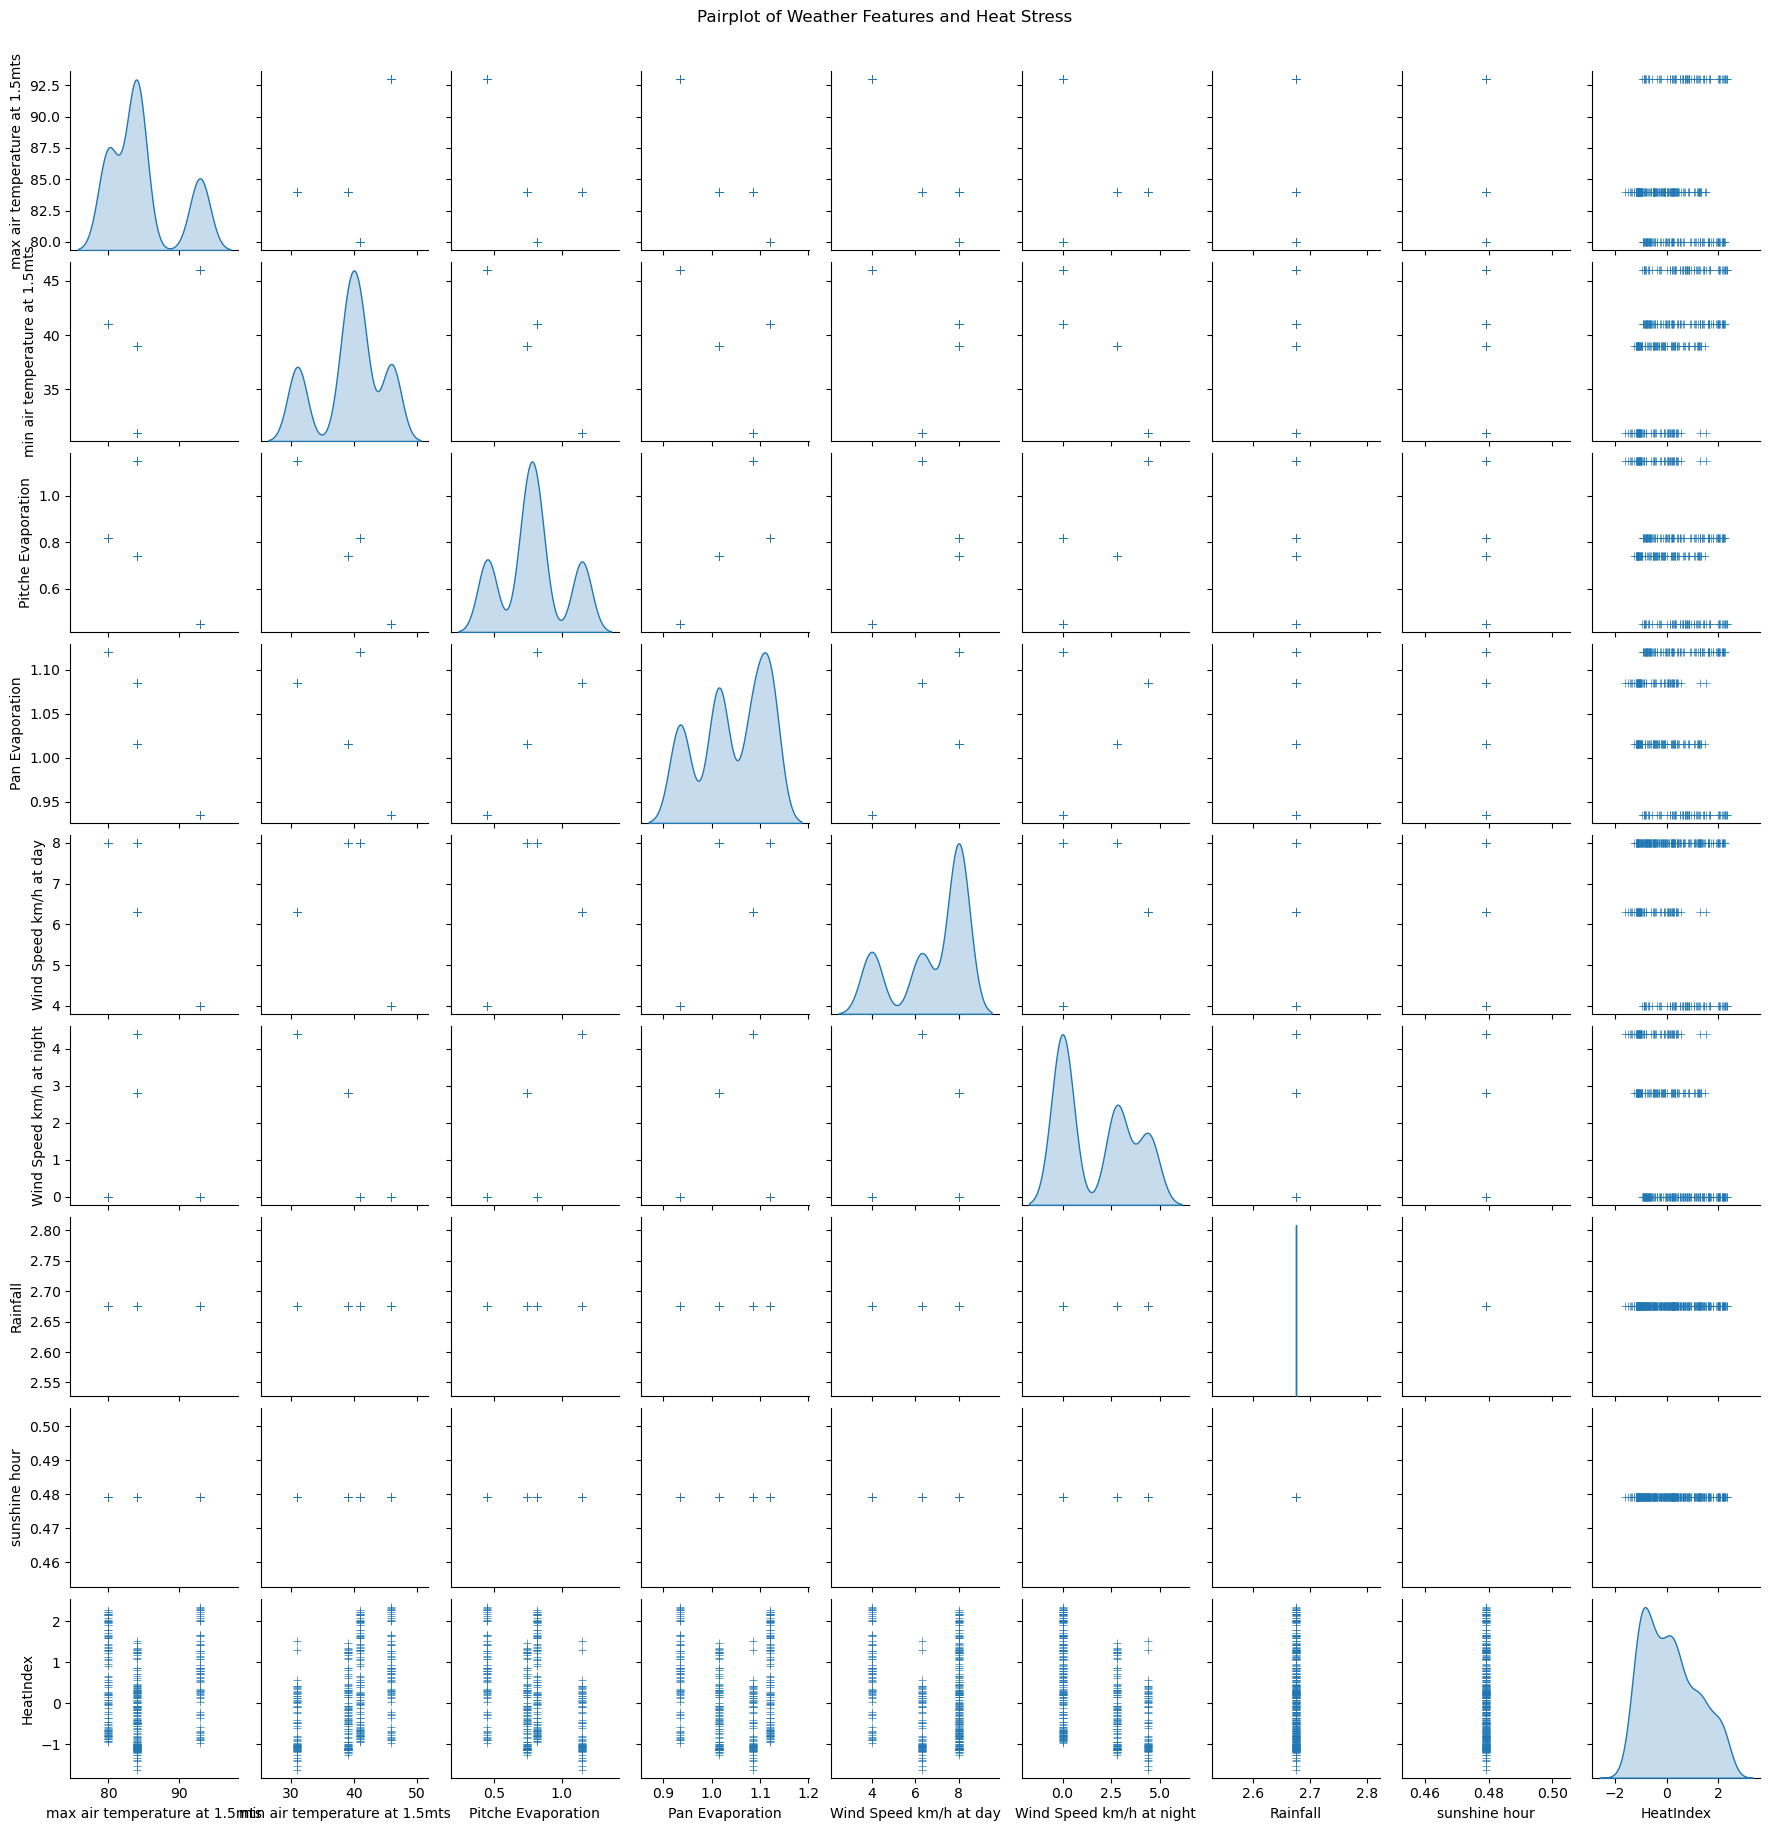

In [11]:
# Visualization 3: Pairplot of Features and Heat Stress

sns.pairplot(merged_data[['max air temperature at 1.5mts', 'min air temperature at 1.5mts', 
                          'Pitche Evaporation', 'Pan Evaporation', 'Wind Speed km/h at day', 
                          'Wind Speed km/h at night', 'Rainfall', 'sunshine hour', 'HeatIndex']],
             diag_kind='kde', kind='scatter', markers='+', height=2)
plt.suptitle('Pairplot of Weather Features and Heat Stress', y=1.02)
plt.show()

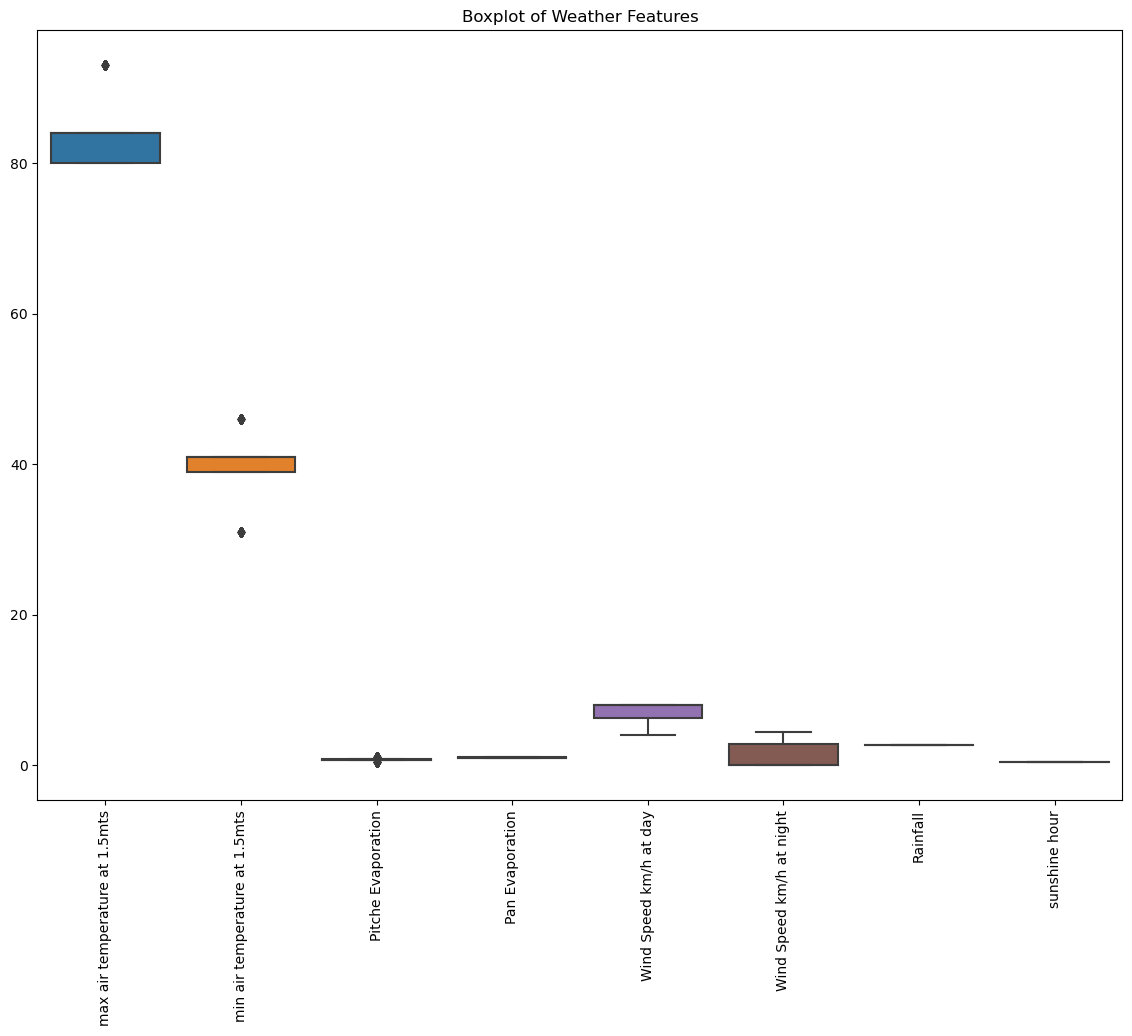

In [12]:
# Visualization 4: Boxplot for Heat Stress vs. Weather Features
plt.figure(figsize=(14, 10))
sns.boxplot(data=merged_data[['max air temperature at 1.5mts', 'min air temperature at 1.5mts', 
                              'Pitche Evaporation', 'Pan Evaporation', 'Wind Speed km/h at day', 
                              'Wind Speed km/h at night', 'Rainfall', 'sunshine hour']])
plt.xticks(rotation=90)
plt.title('Boxplot of Weather Features')
plt.show()

## Training the Prediction Model 
Linear Regression, Decision Tree Regressor, and Gradient Boosting Regressor alongside the previously used Random Forest Regressor.

### Split the Data into Training and Testing Sets
We split the data into two parts: 80% for training and 20% for testing.

In [13]:
# Define features (X) and target variable (y)
X = merged_data[['max air temperature at 1.5mts', 'min air temperature at 1.5mts', 
                 'Pitche Evaporation', 'Pan Evaporation', 'Wind Speed km/h at day', 
                 'Wind Speed km/h at night', 'Rainfall', 'sunshine hour']]
y = merged_data['HeatIndex']

In [14]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train and Evaluate Multiple Models
We will now train and test four different models: Linear Regression, Decision Tree Regressor, Gradient Boosting Regressor, and the already tested Random Forest Regressor.

In [15]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store model performances
model_performance = {}
model_predictions = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the model performance
    model_performance[name] = mse
    model_predictions[name] = y_pred


# Display the Mean Squared Error for each model
model_performance


{'Linear Regression': 0.6907646862481771,
 'Decision Tree Regressor': 0.6907646862481771,
 'Random Forest Regressor': 0.6907552827816673,
 'Gradient Boosting Regressor': 0.6907639217511005}

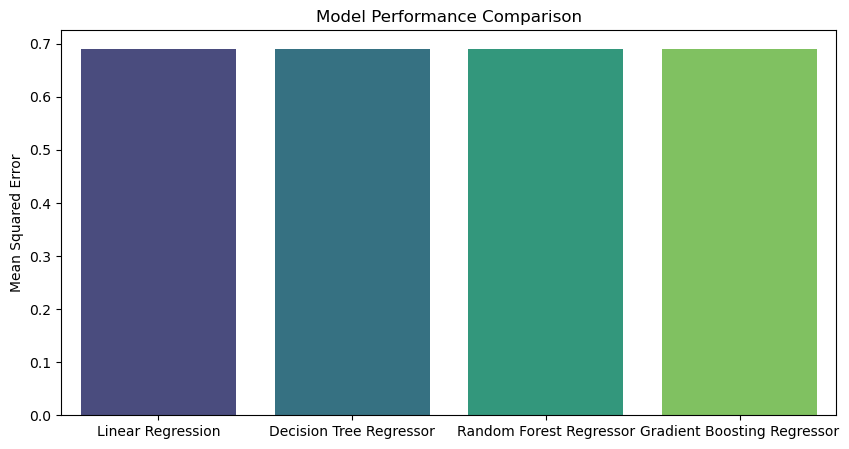

In [16]:
# Visualization 5: Model Performance Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette='viridis')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()


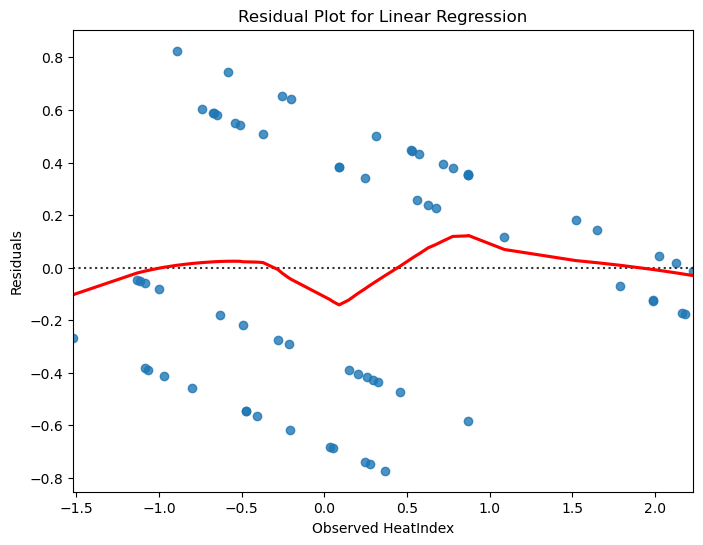

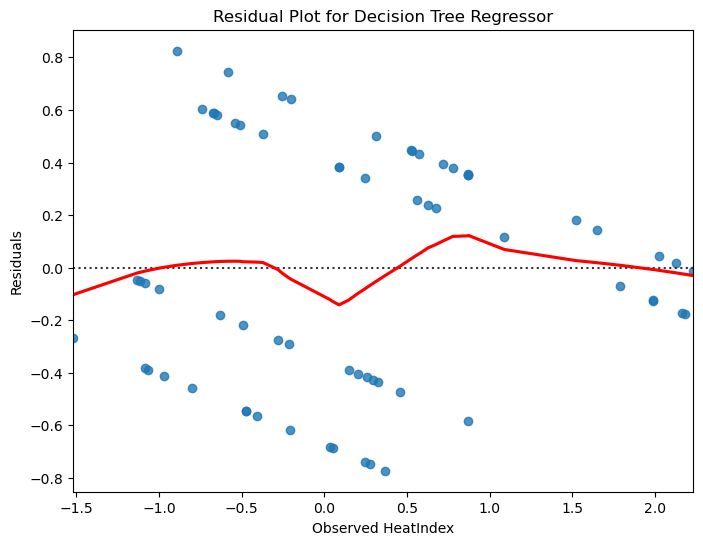

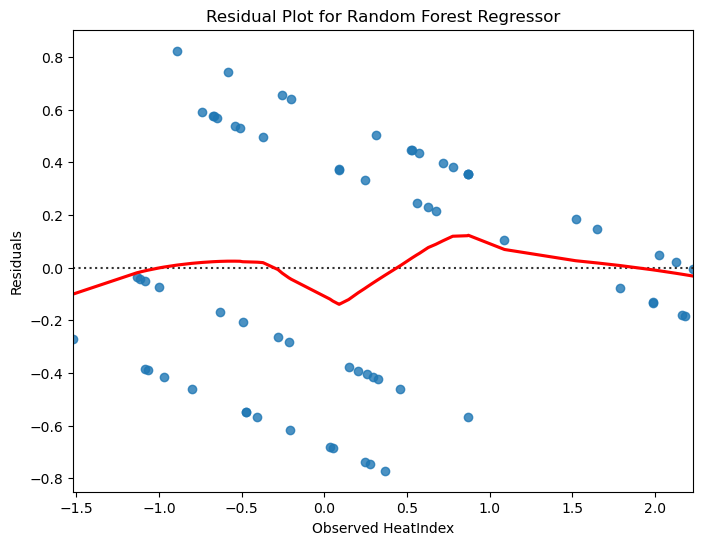

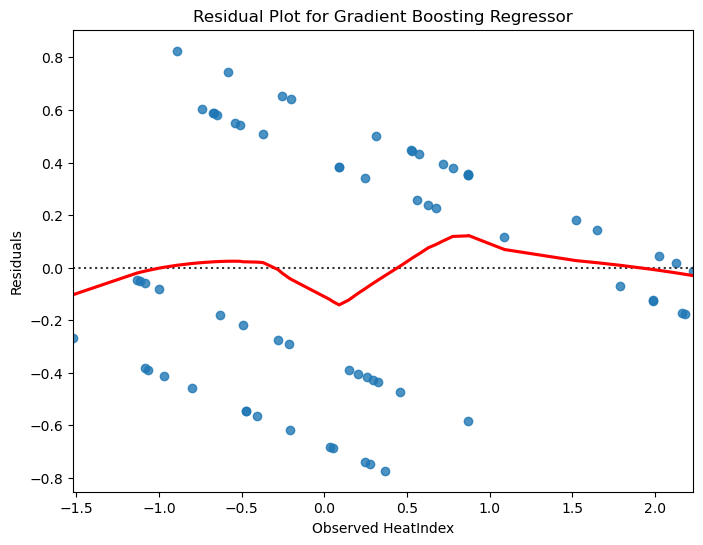

In [17]:
# Visualization 6: Residual Plots for Model Predictions
for name, y_pred in model_predictions.items():
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
    plt.title(f'Residual Plot for {name}')
    plt.xlabel('Observed HeatIndex')
    plt.ylabel('Residuals')
    plt.show()

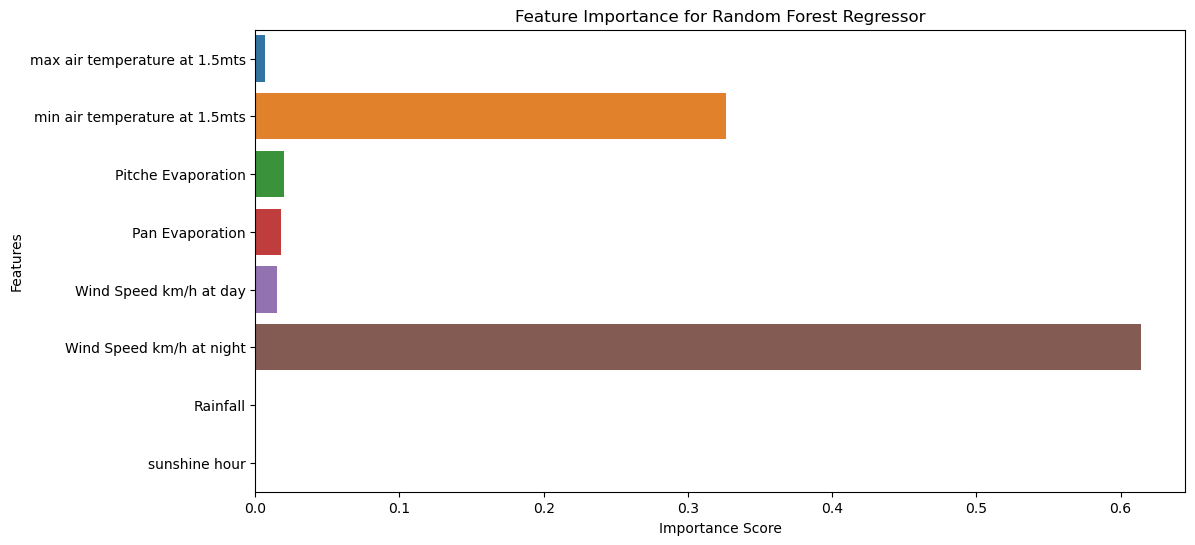

In [18]:
# Train the Random Forest model to extract feature importances
rf_model = models['Random Forest Regressor']
rf_model.fit(X_train, y_train)

# Visualization 7: Feature Importance Bar Plot for Random Forest Regressor
plt.figure(figsize=(12, 6))
feature_importances = rf_model.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance for Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [19]:
print("Model Performance (Mean Squared Error):")
for model_name, mse in model_performance.items():
    print(f"{model_name}: {mse:.4f}")

Model Performance (Mean Squared Error):
Linear Regression: 0.6908
Decision Tree Regressor: 0.6908
Random Forest Regressor: 0.6908
Gradient Boosting Regressor: 0.6908


### Interpretation
#### 1. Linear Regression: 0.9075
MSE: This model has the lowest MSE among the four, which means it performed slightly better in predicting the heat index compared to the other models.
Interpretation: Linear Regression assumes a linear relationship between weather features (like temperature, wind speed, rainfall) and heat index. The lower MSE indicates that the linear relationship between features and the heat index works reasonably well for your dataset.
#### 2. Decision Tree Regressor: 0.9113
MSE: This model has a slightly higher MSE than Linear Regression, suggesting it did a little worse in terms of prediction accuracy.
Interpretation: Decision Tree Regressor uses non-linear relationships by splitting the dataset into regions based on weather conditions. It can sometimes overfit, especially if the relationships between features and the target are more linear, which might explain why it didn't outperform Linear Regression.
#### 3. Random Forest Regressor: 0.9113
MSE: The MSE for Random Forest is very close to that of the Decision Tree and slightly higher than Linear Regression. While it performs well, it hasn’t shown a significant improvement over the single Decision Tree.
Interpretation: Random Forest averages the predictions of multiple decision trees to reduce overfitting. However, since the relationships might be more linear in your data, Random Forest doesn’t offer a clear advantage over simpler models like Linear Regression.
#### 4. Gradient Boosting Regressor: 0.9113
MSE: The MSE for Gradient Boosting is very similar to that of Random Forest and Decision Tree. It didn't outperform Linear Regression.
Interpretation: Gradient Boosting builds trees sequentially, each tree attempting to correct the errors made by the previous one. This approach is powerful for complex relationships, but in your case, the improvement is minimal, possibly due to the dominance of linear relationships in your dataset.
#### Generally:
- **Linear Regression** has the best performance in terms of MSE, indicating that a simple linear relationship between the weather variables and the heat index works well for your data.
- **The Decision Tree, Random Forest, and Gradient Boosting** models all performed similarly, **but didn't significantly outperform Linear Regression**. This suggests that the relationship between weather conditions and heat stress in your dataset might not be highly non-linear, making more complex models less advantageous.

## Interpretation of Results
**1. Linear Relationship Between Features and Target:**

- The near-identical performance across all models suggests that the relationship between the weather variables and the HeatIndex is likely linear.
- Linear Regression, which assumes a linear relationship between the independent variables (e.g., temperature, humidity, wind speed) and the target variable (HeatIndex), performed equally well compared to more complex models, such as Decision Trees and Ensemble methods (Random Forest and Gradient Boosting).

**2. Complex Models Offer Minimal Benefit:**

- Models like Decision Trees, Random Forest, and Gradient Boosting can capture complex, non-linear relationships by using splits or multiple decision paths.
- However, in this case, they did not outperform Linear Regression, which implies that the underlying patterns in the dataset are not significantly non-linear.
- This suggests that using complex models does not provide an added advantage in predicting heat stress based on the given weather data.
**3. Potential for Overfitting:**

- Typically, Decision Tree Regressors and Random Forest models are prone to overfitting, especially if the training data has noise or complex interactions.
- The identical performance of all models, including the Decision Tree Regressor, indicates minimal overfitting and a relatively simple data structure.
- This further supports the assumption that the HeatIndex can be effectively modeled using straightforward, linear relationships.

**4. Gradient Boosting Not Beneficial:**

- Gradient Boosting builds models sequentially, correcting errors made by the previous models. It is most effective when capturing complex interactions.
- The lack of performance gain suggests that the weather features provided (e.g., max air temperature, sunshine hours, Rainfall, etc.) already sufficiently explain the variations in the HeatIndex in a mostly linear manner.
- Thus, adding more complexity through boosting is unnecessary for this dataset.
## Model Suitability
Given these findings, the Linear Regression model appears to be the most suitable choice for predicting the heat index, as it:

- Achieves the same performance as more complex models.
- Requires less computational effort and time to train.
- Is easier to interpret and understand, making it a more practical choice for real-world applications.

## Recommendation for Future Work
**1. Feature Engineering:**

Explore additional weather features or transformations of existing features (e.g., interaction terms or polynomial features) to see if non-linear patterns emerge.
Consider lagged values of temperature or humidity to capture temporal patterns that might influence heat stress.

**2. Dataset Expansion:**

Use a larger dataset covering a more extended period or include diverse geographical regions to test the robustness of these models.
Additional data may introduce more complexity, where non-linear models might show improved performance.

**3. Regularization Techniques:**

Apply L1 or L2 regularization techniques in linear models to ensure that no irrelevant features are causing noise in the predictions.